In [1]:
import ipympl
%matplotlib widget
%matplotlib inline
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
from sympy import *
import pandas as pd
from causalgraphicalmodels import CausalGraphicalModel
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

# El Modelo Macroeconómico IS-LM

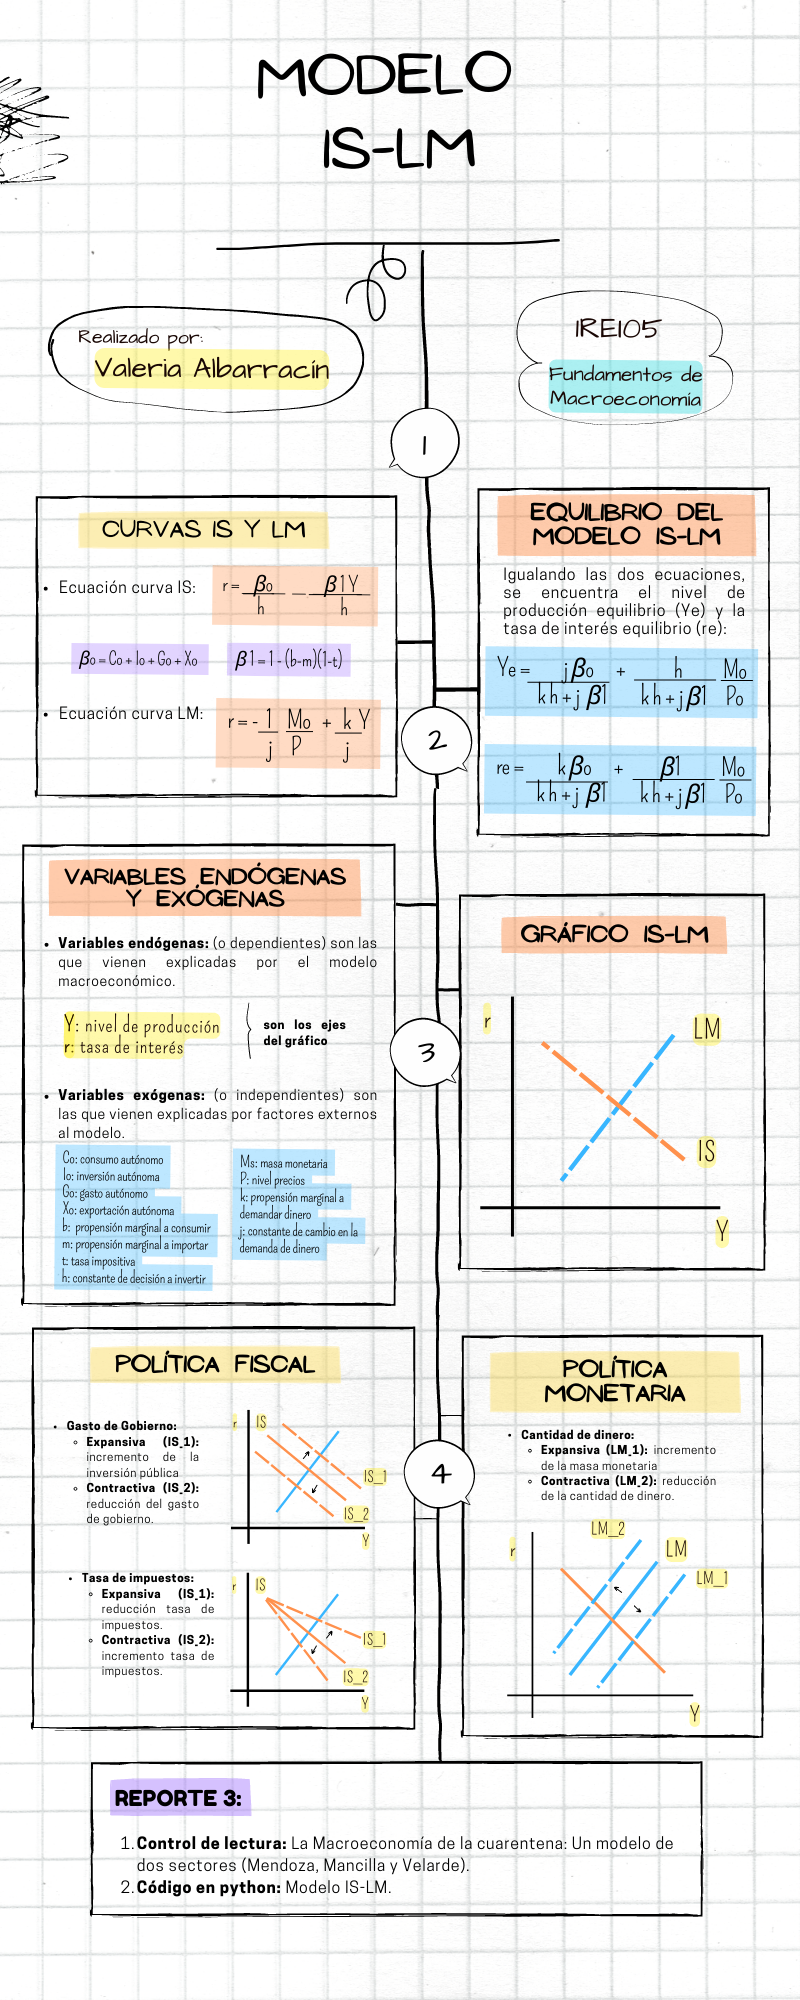

In [2]:
Image('tutorial5.png')

## ¿Cómo son las pendientes de las curvas IS-LM? 

In [3]:
#--------------------------------------------------
    # Curva IS

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo)/h - ( ( 1-(b-m)*(1-t) ) / h)*Y  
    return r_IS

r_is = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#--------------------------------------------------
    # Curva LM 

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def r_LM(k, j, Ms, P, Y):
    r_LM = - (1/j)*(Ms/P) + (k/j)*Y
    return r_LM

r_lm = r_LM( k, j, Ms, P, Y)

In [4]:
# Primero declarar los simbolos
Co, Io, Go, Xo, h, r, b, m, t, Y = symbols('Co Io Go Xo h r b m t Y')

# Ecuacion de la curva IS 
r_eq_is = (Co + Io + Go + Xo)/h - ( ( 1-(b-m)*(1-t) ) / h)*Y

# tomar diferenciales
df_r_eq_is_y = diff(r_eq_is, Y)

print("La pendiente de la curva IS es", df_r_eq_is_y)  # este diferencial es positivo

La pendiente de la curva IS es -(-(1 - t)*(b - m) + 1)/h


In [5]:
# Declaren todos los parametros de la curva lm como simbolos
k, j, Ms, P, Y = symbols('k j Ms P Y')

# Escribir la ecuacion de la LM 
r_eq_lm = - (1/j)*(Ms/P) + (k/j)*Y

# TOMAR el diferencial
df_r_eq_lm_y = diff(r_eq_lm, Y)
print("La pendiente de la curva IS es", df_r_eq_lm_y)  # este diferencial es positivo

La pendiente de la curva IS es k/j


## El equilibrio en el Modelo IS-LM

Por un lado, considerando la ecuación de la curva IS

$$ r = \frac{B_o}{h} - \frac{B_1}{h}Y $$

- Donde $ B_0 = C_o + I_o + G_o + X_o $ y $ B_1 = 1 - (b - m)(1 - t) $

Y, por otro lado, la ecuación de la curva LM:

$$  r = -\frac{1}{j}\frac{Mo^s}{P_o} + \frac{k}{j}Y $$

Podemos igualar, sustituir o reducir ambas ecuaciones para encontrar el nivel de Ingresos equilibrio $(Y^e)$ y la tasa de interés de equilibrio $(r^e)$:

$$ -\frac{1}{j}\frac{Mo^s}{P_o} + \frac{k}{j}Y = \frac{B_o}{h} - \frac{B_1}{h}Y $$

- Ingreso de equilibrio:

$$ Y^e = \frac{j B_o}{k h + j B_1} + (\frac{h}{k h + j B_1})\frac{Ms_o}{P_o} $$

- Tasa de interés de equilibrio:

$$ r^e = \frac{kB_o}{kh + jB_1} - (\frac{B_1}{kh + jB_1})\frac{Ms_o}{P_o} $$

Estas dos ecuaciones representan el modelo IS-LM

### Gráfico del equilibrio en el Modelo IS-LM

In [6]:
#--------------------------------------------------
    # Curva IS

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo)/h - ( ( 1-(b-m)*(1-t) ) / h)*Y  
    return r_IS

r_is = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#--------------------------------------------------
    # Curva LM 

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def r_LM(k, j, Ms, P, Y):
    r_LM = - (1/j)*(Ms/P) + (k/j)*Y
    return r_LM

r_lm = r_LM( k, j, Ms, P, Y)

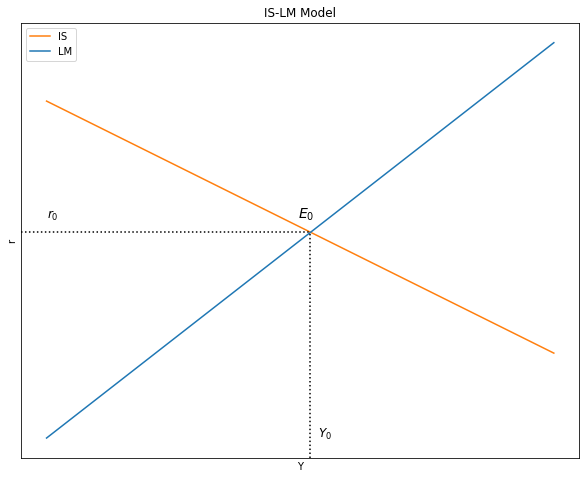

In [7]:
# Gráfico del modelo IS-LM

# Dimensiones del gráfico
y_max = np.max(r_lm)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
# Curva IS
ax.plot(Y, r_is, label = "IS", color = "C1") #IS
# Curva LM
ax.plot(Y, r_lm, label="LM", color = "C0")  #LM

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Texto y figuras agregadas
# Graficar la linea horizontal - r
plt.axvline(x=51.5,  ymin= 0, ymax= 0.52, linestyle = ":", color = "black")
# Grafica la linea vertical - Y
plt.axhline(y=93, xmin= 0, xmax= 0.52, linestyle = ":", color = "black")

# Plotear los textos 
plt.text(49,100, '$E_0$', fontsize = 14, color = 'black')
plt.text(0,100, '$r_0$', fontsize = 12, color = 'black')
plt.text(53,-10, '$Y_0$', fontsize = 12, color = 'black')

# Título, ejes y leyenda
ax.set(title="IS-LM Model", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()

### Ecuaciones de equilibrio 

In [8]:
# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
Y_eq = (k*beta_0)/(k*h + j*beta_1) - ( beta_1 / (k*h + j*beta_1) )*(Ms/P)
r_eq = (j*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms/P)

## Estática comparativa

### Política Fiscal Expansiva:


- Mercado de Bienes
$$ Go↑ → DA↑ → DA>Y → Y↑ $$ 
- Mercado de dinero
$$ Y↑ → Md↑ → Md>Ms → r↑ $$ 

- **Matemática**:

In [9]:
# nombrar variables como símbolos
Co, Io, Go, Xo, h, r, b, m, t, beta_0, beta_1  = symbols('Co Io Go Xo h r b m t beta_0, beta_1')

# nombrar variables como símbolos
k, j, Ms, P, Y = symbols('k j Ms P Y')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
r_eq = (k*beta_0)/(k*h + j*beta_1) - ( beta_1 / (k*h + j*beta_1) )*(Ms/P)
Y_eq = (j*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms/P)

In [10]:
df_Y_eq_Go = diff(Y_eq, Go)
print("El Diferencial del Producto con respecto al diferencial del gasto autonomo = ", df_Y_eq_Go)  # este diferencial es positivo

El Diferencial del Producto con respecto al diferencial del gasto autonomo =  j/(h*k + j*(-(1 - t)*(b - m) + 1))


In [11]:
df_r_eq_Go = diff(r_eq, Go)
print("El Diferencial de la tasa de interes con respecto al diferencial del gasto autonomo = ", df_r_eq_Go)  # este diferencial es positivo

El Diferencial de la tasa de interes con respecto al diferencial del gasto autonomo =  k/(h*k + j*(-(1 - t)*(b - m) + 1))


- **Grafica**:

In [12]:
#1--------------------------------------------------
    # Curva IS ORIGINAL

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#2--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

In [13]:
#--------------------------------------------------
    # NUEVA curva IS: reducción Gasto de Gobienro (Go)
    
# Definir SOLO el parámetro cambiado
Go = 80

# Generar la ecuación con el nuevo parámetro
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r_G = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)

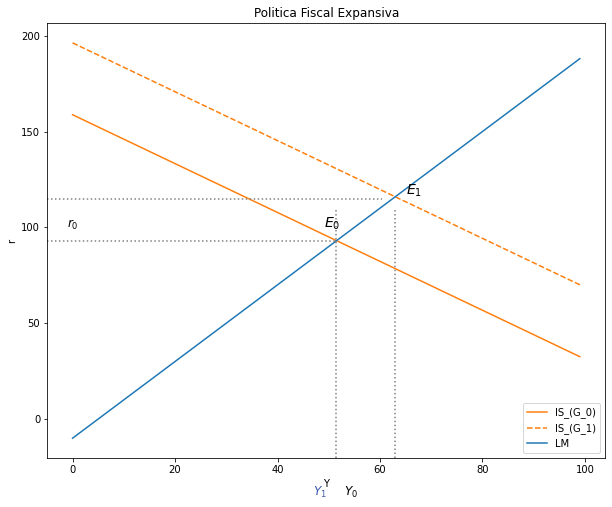

In [14]:
# Gráfico

# Dimensiones del gráfico
y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r, label = "IS_(G_0)", color = "C1") #IS_orginal
ax.plot(Y, r_G, label = "IS_(G_1)", color = "C1", linestyle = 'dashed') #IS_modificada

ax.plot(Y, i, label="LM", color = "C0")  #LM_original

# Texto y figuras agregadas
plt.axvline(x=51.5,  ymin= 0, ymax= 0.57, linestyle = ":", color = "grey")
plt.axhline(y=93, xmin= 0, xmax= 0.52, linestyle = ":", color = "grey")

plt.axvline(x=63,  ymin= 0, ymax= 0.57, linestyle = ":", color = "grey")
plt.axhline(y=115, xmin= 0, xmax= 0.6, linestyle = ":", color = "grey")
plt.text(65,117, '$E_1$', fontsize = 14, color = 'black')

plt.text(49,100, '$E_0$', fontsize = 14, color = 'black')
plt.text(-1,100, '$r_0$', fontsize = 12, color = 'black')
plt.text(53,-40, '$Y_0$', fontsize = 12, color = 'black')
#plt.text(50,52, '$E_1$', fontsize = 14, color = '#3D59AB')
#plt.text(-1,72, '$r_1$', fontsize = 12, color = '#3D59AB')
plt.text(47,-40, '$Y_1$', fontsize = 12, color = '#3D59AB')

#plt.text(69, 115, '→', fontsize=15, color='grey')
#plt.text(69, 52, '←', fontsize=15, color='grey')

# Título, ejes y leyenda
ax.set(title="Politica Fiscal Expansiva", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()


### Política Monetaria Expansiva

- Mercado de dinero
$$ Ms↑ → M^o↑ → M^o > M^d → r↓ $$

- Mercado de Bienes
$$ r↓ → I↑ → DA>Y → Y↑ $$ 

In [15]:
# nombrar variables como símbolos
Co, Io, Go, Xo, h, r, b, m, t, beta_0, beta_1  = symbols('Co Io Go Xo h r b m t beta_0, beta_1')

# nombrar variables como símbolos
k, j, Ms, P, Y = symbols('k j Ms P Y')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
Y_eq = (k*beta_0)/(k*h + j*beta_1) - ( beta_1 / (k*h + j*beta_1) )*(Ms/P)
r_eq = (j*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms/P)

In [16]:
df_r_eq_Ms = diff(r_eq, Ms)
print("El Diferencial de la tasa de interes con respecto al diferencial de la masa monetaria = ", df_r_eq_Ms)  # este diferencial es positivo

El Diferencial de la tasa de interes con respecto al diferencial de la masa monetaria =  h/(P*(h*k + j*(-(1 - t)*(b - m) + 1)))


In [17]:
df_Y_eq_Ms = diff(Y_eq, Ms)
print("El Diferencial del producto con respecto al diferencial de la masa monetaria = ", df_Y_eq_Ms)  # este diferencial es positivo

El Diferencial del producto con respecto al diferencial de la masa monetaria =  -(-(1 - t)*(b - m) + 1)/(P*(h*k + j*(-(1 - t)*(b - m) + 1)))


In [18]:
#1--------------------------------------------------
    # Curva IS ORIGINAL

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#2--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

In [19]:
# Definir SOLO el parámetro cambiado
Ms = 700

# Generar nueva curva LM con la variacion del Ms
def i_LM_Ms( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_Ms = i_LM_Ms( k, j, Ms, P, Y)

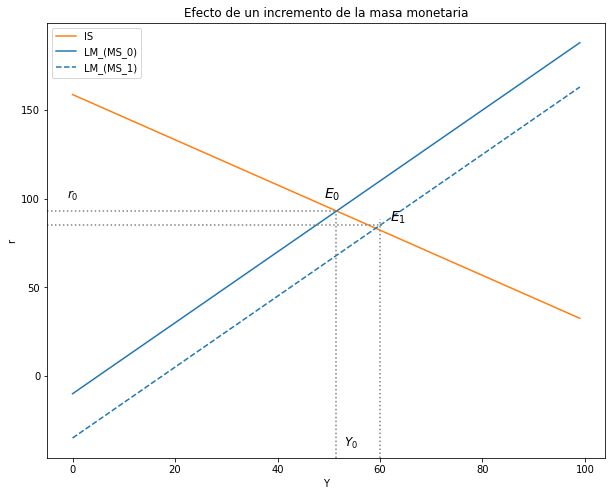

In [20]:
# Gráfico

# Dimensiones del gráfico
y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r, label = "IS", color = "C1") #IS_orginal
ax.plot(Y, i, label="LM_(MS_0)", color = "C0")  #LM_original

ax.plot(Y, i_Ms, label="LM_(MS_1)", color = "C0", linestyle = 'dashed')  #LM_modificada

# Lineas de equilibrio_0 
plt.axvline(x=51.5,  ymin= 0, ymax= 0.57, linestyle = ":", color = "grey")
plt.axhline(y=93, xmin= 0, xmax= 0.52, linestyle = ":", color = "grey")

# Lineas de equilibrio_1 
plt.axvline(x=60,  ymin= 0, ymax= 0.55, linestyle = ":", color = "grey")
plt.axhline(y=85, xmin= 0, xmax= 0.6, linestyle = ":", color = "grey")
plt.text(62,87, '$E_1$', fontsize = 14, color = 'black')

#plt.axhline(y=68, xmin= 0, xmax= 0.52, linestyle = ":", color = "grey")

# Textos ploteados
plt.text(49,100, '$E_0$', fontsize = 14, color = 'black')
plt.text(-1,100, '$r_0$', fontsize = 12, color = 'black')
plt.text(53,-40, '$Y_0$', fontsize = 12, color = 'black')
#plt.text(50,52, '$E_1$', fontsize = 14, color = '#3D59AB')
#plt.text(-1,72, '$r_1$', fontsize = 12, color = '#3D59AB')
#plt.text(47,-40, '$Y_1$', fontsize = 12, color = '#3D59AB')

#plt.text(69, 115, '→', fontsize=15, color='grey')
#plt.text(69, 52, '←', fontsize=15, color='grey')

# Título, ejes y leyenda
ax.set(title="Efecto de un incremento de la masa monetaria", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()


## Ejercicios

### Analice los efectos sobre las variables endógenas a partir de una disminución del gasto fiscal $(∆G_0 < 0)$ 

- Intuición:

$$ Go↓ → DA↓ → DA < Y → Y↓ $$

$$ Y↓ → M^d↓ → M^d < M^s → r↓ $$

- Matemática:

In [21]:
# nombrar variables como símbolos
Co, Io, Go, Xo, h, r, b, m, t, beta_0, beta_1  = symbols('Co Io Go Xo h r b m t beta_0, beta_1')

# nombrar variables como símbolos
k, j, Ms, P, Y = symbols('k j Ms P Y')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
r_eq = (k*beta_0)/(k*h + j*beta_1) - ( beta_1 / (k*h + j*beta_1) )*(Ms/P)
Y_eq = (j*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms/P)

In [22]:
df_Y_eq_Go = diff(Y_eq, Go)
print("El Diferencial del Producto con respecto al diferencial del gasto autónomo = ", df_Y_eq_Go)  # este diferencial es positivo

El Diferencial del Producto con respecto al diferencial del gasto autónomo =  j/(h*k + j*(-(1 - t)*(b - m) + 1))


¿$∆Y$ sabiendo que $∆G_0 < 0$?

$$ \frac{∆Y}{∆G_0} = \frac{j}{(h*k + j*(-(1 - t)*(b - m) + 1))} $$

$$ \frac{∆Y}{(-)} = (+) $$

$$ ∆Y < 0 $$

In [23]:
df_r_eq_Go = diff(r_eq, Go)
print("El Diferencial de la tasa de interés con respecto al diferencial del gasto autónomo = ", df_r_eq_Go)  # este diferencial es positivo

El Diferencial de la tasa de interés con respecto al diferencial del gasto autónomo =  k/(h*k + j*(-(1 - t)*(b - m) + 1))


¿$∆r$ sabiendo que $∆G_0 < 0$?

$$ \frac{∆r}{∆G_0} = \frac{k}{(h*k + j*(-(1 - t)*(b - m) + 1))} $$

$$ \frac{∆r}{(-)} = (+) $$

$$ ∆r < 0 $$

- Gráfico:

In [24]:
#1--------------------------------------------------
    # Curva IS ORIGINAL

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.5
m = 0.4
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#2--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

In [25]:
#--------------------------------------------------
    # NUEVA curva IS: reducción Gasto de Gobienro (Go)
    
# Definir SOLO el parámetro cambiado
Go = 25

# Generar la ecuación con el nuevo parámetro
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r_G = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)

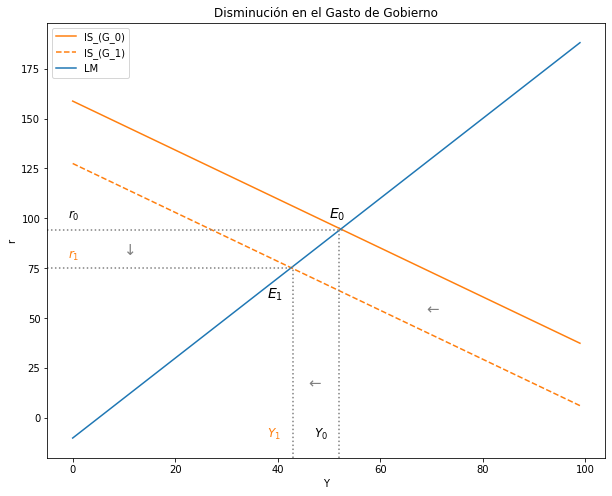

In [26]:
# Gráfico

# Dimensiones del gráfico
y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r, label = "IS_(G_0)", color = "C1") #IS_orginal
ax.plot(Y, r_G, label = "IS_(G_1)", color = "C1", linestyle = 'dashed') #IS_modificada

ax.plot(Y, i, label="LM", color = "C0")  #LM_original

# Texto y figuras agregadas
plt.axvline(x=52,  ymin= 0, ymax= 0.53, linestyle = ":", color = "grey")
plt.axhline(y=94, xmin= 0, xmax= 0.53, linestyle = ":", color = "grey")

plt.axvline(x=43,  ymin= 0, ymax= 0.44, linestyle = ":", color = "grey")
plt.axhline(y=75, xmin= 0, xmax= 0.44, linestyle = ":", color = "grey")

plt.text(38,60, '$E_1$', fontsize = 14, color = 'black')
plt.text(50,100, '$E_0$', fontsize = 14, color = 'black')
plt.text(-1,100, '$r_0$', fontsize = 12, color = 'black')
plt.text(-1,80, '$r_1$', fontsize = 12, color = 'C1')
plt.text(47,-10, '$Y_0$', fontsize = 12, color = 'black')
plt.text(38,-10, '$Y_1$', fontsize = 12, color = 'C1')

plt.text(69, 52, '←', fontsize=15, color='grey')
plt.text(46, 15, '←', fontsize=15, color='grey')
plt.text(10, 82, '↓', fontsize=15, color='grey')

# Título, ejes y leyenda
ax.set(title="Disminución en el Gasto de Gobierno", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()

### Analice los efectos sobre las variables endógenas a partir de una disminución masa monetaria $(∆M^s < 0)$

- Intuición:

$$ M^s ↓ → M^s < M^d → r↑ $$
$$ r↑ → I↓ → DA↓ → DA < Y → Y↓ $$

- Matemática:

In [27]:
# nombrar variables como símbolos
Co, Io, Go, Xo, h, r, b, m, t, beta_0, beta_1  = symbols('Co Io Go Xo h r b m t beta_0, beta_1')

# nombrar variables como símbolos
k, j, Ms, P, Y = symbols('k j Ms P Y')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
r_eq = (k*beta_0)/(k*h + j*beta_1) - ( beta_1 / (k*h + j*beta_1) )*(Ms/P)
Y_eq = (j*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms/P)

In [28]:
df_Y_eq_Ms = diff(Y_eq, Ms)
print("El Diferencial del Producto con respecto al diferencial de la masa monetaria = ", df_Y_eq_Ms)  # este diferencial es positivo

El Diferencial del Producto con respecto al diferencial de la masa monetaria =  h/(P*(h*k + j*(-(1 - t)*(b - m) + 1)))


¿$∆Y$ sabiendo que $∆M^s < 0$?

$$ \frac{∆Y}{∆M^s} = \frac{h}{(P*(h*k + j*(-(1 - t)*(b - m) + 1)))} $$

$$ \frac{∆Y}{(-)} = (+) $$

$$ ∆Y < 0 $$

In [29]:
df_r_eq_Ms = diff(r_eq, Ms)
print("El Diferencial de la tasa de interés con respecto al diferencial de la masa monetaria = ", df_r_eq_Ms)  # este diferencial es negativo

El Diferencial de la tasa de interés con respecto al diferencial de la masa monetaria =  -(-(1 - t)*(b - m) + 1)/(P*(h*k + j*(-(1 - t)*(b - m) + 1)))


¿$∆r$ sabiendo que $∆M^s < 0$?

$$ \frac{∆r}{∆M^s} = \frac{-(-(1 - t)*(b - m) + 1)}{(P*(h*k + j*(-(1 - t)*(b - m) + 1)))} $$

$$ \frac{∆r}{(-)} = (-) $$

$$ ∆r > 0 $$

- Gráfico:

In [30]:
#1--------------------------------------------------
    # Curva IS ORIGINAL

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.5
m = 0.4
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#2--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 700             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

In [31]:
# Definir SOLO el parámetro cambiado
Ms = 200

# Generar nueva curva LM con la variacion del Ms
def i_LM_Ms( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_Ms = i_LM_Ms( k, j, Ms, P, Y)

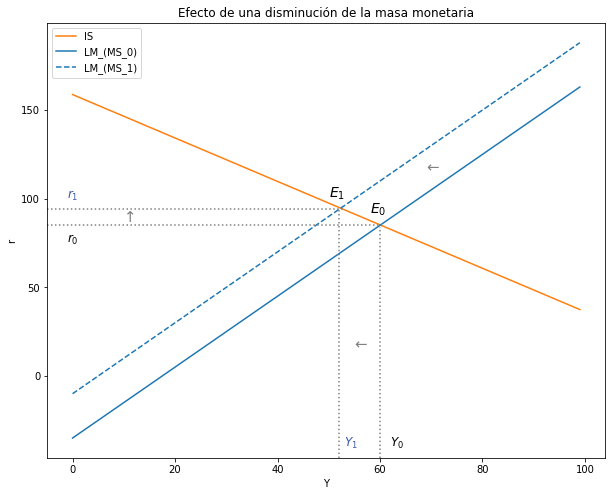

In [32]:
# Dimensiones del gráfico
y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r, label = "IS", color = "C1") #IS_orginal
ax.plot(Y, i, label="LM_(MS_0)", color = "C0")  #LM_original

ax.plot(Y, i_Ms, label="LM_(MS_1)", color = "C0", linestyle = 'dashed')  #LM_modificada

# Lineas de equilibrio_0 
plt.axvline(x=60,  ymin= 0, ymax= 0.53, linestyle = ":", color = "grey")
plt.axhline(y=85, xmin= 0, xmax= 0.6, linestyle = ":", color = "grey")

# Lineas de equilibrio_1 
plt.axvline(x=52,  ymin= 0, ymax= 0.57, linestyle = ":", color = "grey")
plt.axhline(y=94, xmin= 0, xmax= 0.53, linestyle = ":", color = "grey")

# Textos ploteados
plt.text(58,92, '$E_0$', fontsize = 14, color = 'black')
plt.text(50,101, '$E_1$', fontsize = 14, color = 'black')
plt.text(-1,75, '$r_0$', fontsize = 12, color = 'black')
plt.text(62,-40, '$Y_0$', fontsize = 12, color = 'black')
plt.text(-1,100, '$r_1$', fontsize = 12, color = '#3D59AB')
plt.text(53,-40, '$Y_1$', fontsize = 12, color = '#3D59AB')

plt.text(69, 115, '←', fontsize=15, color='grey')
plt.text(55, 15, '←', fontsize=15, color='grey')
plt.text(10, 87, '↑', fontsize=15, color='grey')

# Título, ejes y leyenda
ax.set(title="Efecto de una disminución de la masa monetaria", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()

### A partir del siguiente sistema de ecuaciones que representa el modelo IS-LM

- Mercado de bienes:

$$ C = C_0 + b Y_d $$
$$ I = I_0 - hr $$
$$ G = G_0 $$
$$ T = tY $$
$$ r = i - π^e $$
$$ Y = C + I + G $$

- Mercado de dinero:

$$ \frac{M_o^s}{P_o} = kY - j(r + π^e) $$



#### Encuentre las ecuaciones de Ingreso $(Y^e)$ y tasa de interes $(r^e)$ de equilibrio 

- Curva IS:

A partir de la nueva identidad Ingreso-Gasto: $ Y = C + I + G $

$$ Y = C_0 + bY^d + I_0 - hr + G_0$$

$$ Y = C_0 + I_0 + G_0 - hr + b(1-t)Y $$

$$ hr = C_0 + I_0 + G_0 + b(1-t)Y - Y $$

$$ hr = C_0 + I_0 + G_0 - Y(1- b(1-t)) $$

La ecuación de la curva IS es:

$$ r = \frac{C_0 + I_0 + G_0}{h} - \frac{1- b(1-t)}{h}Y $$

$$ r = \frac{B_0}{h} - \frac{B_1}{h}Y $$

Donde $B_0 = C_0 + I_0 + G_0 $ y $ B_1 = 1- b(1-t) $

- Curva LM:

$$ \frac{M^s_0}{P_0} = kY - j(r + π^e) $$

$$ j(r + π^e) = kY - \frac{M^s_0}{P_0} $$

$$ r + π^e = - \frac{M^s_0}{jP_0} + \frac{kY}{j} $$

La ecuación de la curva LM es:

$$ r = - \frac{M^s_0}{jP_0} + \frac{k}{j}Y - π^e $$

- Equilibrio modelo IS-LM:

Para hallar $Y^e$:

$$ \frac{B_0}{h} - \frac{B_1}{h}Y = - \frac{M^s_0}{jP_0} + \frac{k}{j}Y - π^e $$


$$ \frac{B_0}{h} + \frac{M^s_0}{jP_0} + π^e = \frac{k}{j}Y + \frac{B_1}{h}Y $$

$$ Y(\frac{k}{j} + \frac{B_1}{h}) = \frac{B_0}{h} + \frac{M^s_0}{jP_0} + π^e $$

$$ Y(\frac{hk + jB_1}{jh}) = \frac{B_0}{h} + \frac{M^s_0}{jP_0} + π^e $$

$$ Y^e = \frac{jB_0}{kh + jB_1} + \frac{M_0^s}{P_0} \frac{h}{kh + jB_1} + \frac{jh}{kh + jB_1} π^e $$

Para hallar $r^e$:

$$ r^e = - \frac{Ms_o}{P_o} (\frac{B_1}{kh + jB_1}) + \frac{kB_o}{kh + jB_1} - \frac{B_1}{kh + jB_1} π^e $$


#### Grafique el equilibrio simultáneo en los mercados de bienes y de dinero

In [33]:
#--------------------------------------------------
    # Curva IS

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
h = 0.8
b = 0.5
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS_2(b, t, Co, Io, Go, h, Y):
    r_IS_2 = (Co + Io + Go - Y * (1-b*(1-t)))/h
    return r_IS_2

r_2 = r_IS_2(b, t, Co, Io, Go, h, Y)


#--------------------------------------------------
    # Curva LM 

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20
π = 4

Y = np.arange(Y_size)

# Ecuación

def i_LM_2(k, j, Ms, P, Y, π):
    i_LM_2 = (-Ms/P)/j + k/j*Y - π
    return i_LM_2

i_2 = i_LM_2( k, j, Ms, P, Y, π)

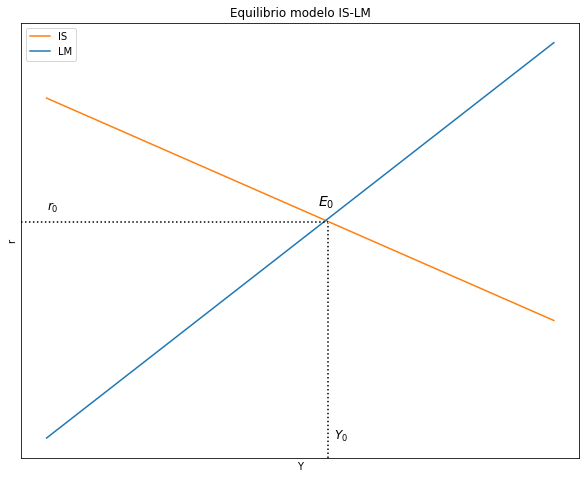

In [34]:
    # Gráfico del modelo IS-LM

# Dimensiones del gráfico
y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r_2, label = "IS", color = "C1") #IS
ax.plot(Y, i_2, label="LM", color = "C0")  #LM

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Texto y figuras agregadas
plt.axvline(x=55,  ymin= 0, ymax= 0.54, linestyle = ":", color = "black")
plt.axhline(y=94, xmin= 0, xmax= 0.55, linestyle = ":", color = "black")
plt.text(53,102, '$E_0$', fontsize = 14, color = 'black')
plt.text(0,100, '$r_0$', fontsize = 12, color = 'black')
plt.text(56,-15, '$Y_0$', fontsize = 12, color = 'black')

# Título, ejes y leyenda
ax.set(title="Equilibrio modelo IS-LM", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()

In [35]:
# nombrar variables como símbolos
Co, Io, Go, h, r, b, t, beta_0, beta_1  = symbols('Co, Io, Go, h, r, b, t, beta_0, beta_1')

# nombrar variables como símbolos
k, j, Ms, P, Y, π = symbols('k j Ms P Y π')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go)
beta_1 = (1 - b*(1-t))

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
r_eq = -(Ms/P)*(beta_1/(k*h+j*beta_1)) + ((k*beta_0)/k*h+j*beta_1) - ((beta_1*π)/k*h+j*beta_1)
Y_eq = ((j*beta_0)/(k*h+j*beta_1)) + (Ms/P)*(h/(k*h+j*beta_1)) + (j*h*π/(k*h+j*beta_1))

#### Analice los efectos sobre las variables endógenas Y, r de una disminución de los Precios $(∆P_0 < 0)$

- Matemática:

In [36]:
# nombrar variables como símbolos
Co, Io, Go, h, r, b, t, beta_0, beta_1  = symbols('Co, Io, Go, h, r, b, t, beta_0, beta_1')

# nombrar variables como símbolos
k, j, Ms, P, Y, π = symbols('k j Ms P Y π')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go)
beta_1 = (1 - b*(1-t))

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
r_eq = -(Ms/P)*(beta_1/(k*h+j*beta_1)) + ((k*beta_0)/k*h+j*beta_1) - ((beta_1*π)/k*h+j*beta_1)
Y_eq = ((j*beta_0)/(k*h+j*beta_1)) + (Ms/P)*(h/(k*h+j*beta_1)) + (j*h*π/(k*h+j*beta_1))

In [37]:
df_Y_eq_P = diff(Y_eq, P)
print("El Diferencial del Producto con respecto al diferencial del nivel de precios = ", df_Y_eq_P)

El Diferencial del Producto con respecto al diferencial del nivel de precios =  -Ms*h/(P**2*(h*k + j*(-b*(1 - t) + 1)))


¿$∆Y$ sabiendo que $∆P < 0$?

$$ \frac{∆Y}{∆P} = (-) $$

$$ \frac{∆Y}{(-)} = (-) $$

$$ ∆Y > 0 $$

In [38]:
df_r_eq_P = diff(r_eq, P)
print("El Diferencial de la tasa de interés con respecto al diferencial del nivel de precios = ", df_r_eq_P)

El Diferencial de la tasa de interés con respecto al diferencial del nivel de precios =  Ms*(-b*(1 - t) + 1)/(P**2*(h*k + j*(-b*(1 - t) + 1)))


¿$∆r$ sabiendo que $∆P < 0$?

$$ \frac{∆r}{∆P} = (+) $$

$$ \frac{∆r}{(-)} = (+) $$

$$ ∆r < 0 $$

- Intuición:

$$ P↓ → M^s↑ → M^s > M^d → r↓ $$

$$ r↓ → I↑ → DA↑ → DA > Y → Y↑ $$

In [39]:
#--------------------------------------------------
    # Curva IS

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
h = 0.8
b = 0.5
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS_2(b, t, Co, Io, Go, h, Y):
    r_IS_2 = (Co + Io + Go - Y * (1-b*(1-t)))/h
    return r_IS_2

r_2 = r_IS_2(b, t, Co, Io, Go, h, Y)


#--------------------------------------------------
    # Curva LM 

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20
π = 4

Y = np.arange(Y_size)

# Ecuación

def i_LM_2(k, j, Ms, P, Y, π):
    i_LM_2 = (-Ms/P)/j + k/j*Y - π
    return i_LM_2

i_2 = i_LM_2( k, j, Ms, P, Y, π)


#--------------------------------------------------
    # Nueva curva LM 
    
P = 5

# Ecuación

def i_LM_2(k, j, Ms, P, Y, π):
    i_LM_2 = (-Ms/P)/j + k/j*Y - π
    return i_LM_2

i_2_P = i_LM_2( k, j, Ms, P, Y, π)

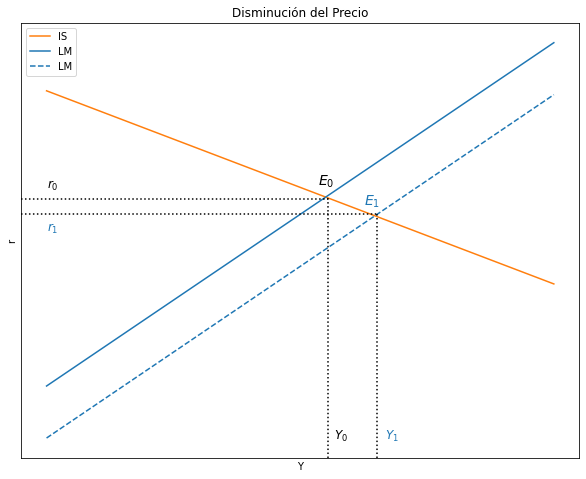

In [40]:
    # Gráfico del modelo IS-LM

# Dimensiones del gráfico
y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r_2, label = "IS", color = "C1") #IS
ax.plot(Y, i_2, label="LM", color = "C0")  #LM
ax.plot(Y, i_2_P, label="LM", color = "C0", linestyle ='dashed')  #LM

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Texto y figuras agregadas
plt.axvline(x=55,  ymin= 0, ymax= 0.6, linestyle = ":", color = "black")
plt.axhline(y=94, xmin= 0, xmax= 0.55, linestyle = ":", color = "black")
plt.text(53,102, '$E_0$', fontsize = 14, color = 'black')
plt.text(0,100, '$r_0$', fontsize = 12, color = 'black')
plt.text(56,-45, '$Y_0$', fontsize = 12, color = 'black')

plt.axvline(x=64.5,  ymin= 0, ymax= 0.56, linestyle = ":", color = "black")
plt.axhline(y=85, xmin= 0, xmax= 0.64, linestyle = ":", color = "black")
plt.text(62,90, '$E_1$', fontsize = 14, color = 'C0')
plt.text(0,75, '$r_1$', fontsize = 12, color = 'C0')
plt.text(66,-45, '$Y_1$', fontsize = 12, color = 'C0')

# Título, ejes y leyenda
ax.set(title="Disminución del Precio", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()

#### Analice los efectos sobre las variables endógenas Y, r de una disminución de la inflación esperada $(∆π < 0)$

- Matemática:

In [41]:
# nombrar variables como símbolos
Co, Io, Go, h, r, b, t, beta_0, beta_1  = symbols('Co, Io, Go, h, r, b, t, beta_0, beta_1')

# nombrar variables como símbolos
k, j, Ms, P, Y, π = symbols('k j Ms P Y π')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go)
beta_1 = (1 - b*(1-t))

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
r_eq = -(Ms/P)*(beta_1/(k*h+j*beta_1)) + ((k*beta_0)/k*h+j*beta_1) - ((beta_1*π)/k*h+j*beta_1)
Y_eq = ((j*beta_0)/(k*h+j*beta_1)) + (Ms/P)*(h/(k*h+j*beta_1)) + (j*h*π/(k*h+j*beta_1))

In [42]:
df_Y_eq_π = diff(Y_eq, π)
print("El Diferencial del Producto con respecto al diferencial del nivel de inflación = ", df_Y_eq_π)


El Diferencial del Producto con respecto al diferencial del nivel de inflación =  h*j/(h*k + j*(-b*(1 - t) + 1))


¿$∆Y$ sabiendo que $∆π < 0$?

$$ \frac{∆Y}{∆π} = (+) $$

$$ \frac{∆Y}{(-)} = (+) $$

$$ ∆Y < 0 $$

In [43]:
df_r_eq_π = diff(r_eq, π)
print("El Diferencial de la tasa de interés con respecto al diferencial del nivel de inflación = ", df_r_eq_π)

El Diferencial de la tasa de interés con respecto al diferencial del nivel de inflación =  -h*(-b*(1 - t) + 1)/k


¿$∆r$ sabiendo que $∆π < 0$?

$$ \frac{∆r}{∆π} = (-) $$

$$ \frac{∆r}{(-)} = (-) $$

$$ ∆r > 0 $$

- Intuición:

$$ π↓ → r↑ $$

$$ r↑ → I↓ → DA↓ → DA < Y → Y↓ $$

In [44]:
#--------------------------------------------------
    # Curva IS

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
h = 0.8
b = 0.5
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS_2(b, t, Co, Io, Go, h, Y):
    r_IS_2 = (Co + Io + Go - Y * (1-b*(1-t)))/h
    return r_IS_2

r_2 = r_IS_2(b, t, Co, Io, Go, h, Y)


#--------------------------------------------------
    # Curva LM 

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20
π = 20

Y = np.arange(Y_size)

# Ecuación

def i_LM_2(k, j, Ms, P, Y, π):
    i_LM_2 = (-Ms/P)/j + k/j*Y - π
    return i_LM_2

i_2 = i_LM_2( k, j, Ms, P, Y, π)


#--------------------------------------------------
    # Nueva curva LM 
    
π = 2

# Ecuación

def i_LM_2(k, j, Ms, P, Y, π):
    i_LM_2 = (-Ms/P)/j + k/j*Y - π
    return i_LM_2

i_2_π = i_LM_2( k, j, Ms, P, Y, π)

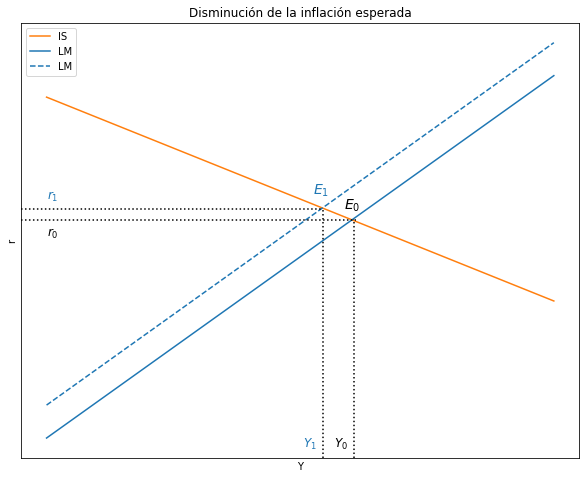

In [46]:
    # Gráfico del modelo IS-LM

# Dimensiones del gráfico
y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r_2, label = "IS", color = "C1") #IS
ax.plot(Y, i_2, label="LM", color = "C0")  #LM
ax.plot(Y, i_2_π, label="LM", color = "C0", linestyle ='dashed')  #LM

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Texto y figuras agregadas
plt.axvline(x=54,  ymin= 0, ymax= 0.57, linestyle = ":", color = "black")
plt.axhline(y=95, xmin= 0, xmax= 0.54, linestyle = ":", color = "black")
plt.text(52,103, '$E_1$', fontsize = 14, color = 'C0')
plt.text(0,100, '$r_1$', fontsize = 12, color = 'C0')
plt.text(50,-35, '$Y_1$', fontsize = 12, color = 'C0')

plt.axvline(x=60,  ymin= 0, ymax= 0.55, linestyle = ":", color = "black")
plt.axhline(y=89, xmin= 0, xmax= 0.6, linestyle = ":", color = "black")
plt.text(58,95, '$E_0$', fontsize = 14, color = 'black')
plt.text(0,80, '$r_0$', fontsize = 12, color = 'black')
plt.text(56,-35, '$Y_0$', fontsize = 12, color = 'black')

# Título, ejes y leyenda
ax.set(title="Disminución de la inflación esperada", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()